Name: Ch.Rani



170101120070




B.Tech CSE




7th sem

# Twitter Sentimental Analysis

# Problem statement:

The problem in sentiment analysis is classifying the polarity of a given text at the document, sentence. Whether the expressed opinion in a document, sentence or an entity feature/aspect is positive, negative, or neutral.




# Abstract:

Social media have received more attention nowadays. Public and private opinion about a wide variety of subjects are expressed and spread continually via numerous social media. Twitter is one of the social media that is gaining popularity. Twitter offers organizations a fast and effective way to analyze customers' perspectives toward the critical to success in the market place. Developing a program for sentiment analysis is an approach to be used to computationally measure customers' perceptions. The aim of this project is to design of a sentiment analysis, extracting a vast amount of tweets.



# Uses of Sentimental Analysis:
Sentiment analysis is extremely useful in social media monitoring as it allows us to gain an overview of the wider public opinion behind certain topics. ... The overall customer experience of your users can be revealed quickly with sentiment analysis, but it can get far more granular too.

In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Read the files

In [2]:
traindf = pd.read_csv("train.csv")
testdf = pd.read_csv("test.csv")
print(traindf.shape)
print(testdf.shape)

(31962, 3)
(17197, 2)


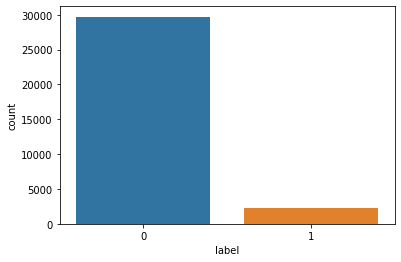

In [3]:
sns.countplot(x= 'label',data = traindf)

In [4]:
traindf.sample(10)

,id,label,tweet
30389,30390,0,constitutional law scholar/prof pres. obama ca...
19006,19007,0,be . it's one way of being wise. - colette
24889,24890,0,"#bestseller @user #motivation ""never go to ..."
15461,15462,0,neo the #samoyed #imgur
9476,9477,1,in ufc pay: amanda nunes (@user who was &amp;...
26102,26103,0,"@user saturday:zorro a siberian husky was ""ab..."
2741,2742,0,to show - -
19092,19093,0,at happy garden cafe âð¿ðð»ð·ð¸...
4970,4971,0,a massive #shoutout to @user @user &amp;others...
13957,13958,0,happy father's day! #dad #father'sday


In [5]:
testdf.sample(10)

,id,tweet
14641,46604,i never realized there was so much turmoil wit...
4877,36840,you look like a witch. in your profile picture...
4615,36578,when you're too careless and your atomizer top...
522,32485,#marathon bull up: you will dominate your bu...
10439,42402,today is a good day!!!
12568,44531,yeaaaahhhhh!!!!!!!!! paramore is making a new ...
7378,39341,even the dogs over the moon when i get a fishy...
11088,43051,"@user wow! i can retweet myself,cannot describ..."
7174,39137,95/96 @user 72-10 season wit a ð&amp;ð f...
1191,33154,@user wtf all the great girl groups are disba...


# Join train and test

In [6]:
combDf = traindf.append(testdf,ignore_index=True)
combDf.sample(10)
print(combDf.columns)

Index(['id', 'label', 'tweet'], dtype='object')


In [7]:
combDf["tweet"] = combDf["tweet"].str.lower()
combDf.sample(5)

,id,label,tweet
25575,25576,0.0,@user cause today belongs to us ð one mis...
20453,20454,0.0,cute expressions ð #doll @user my favorite ...
34607,34608,NaN,for the last 2 months i've been wanting to go ...
7463,7464,0.0,you would struggle to find two nicer people th...
2143,2144,0.0,@user cannot wait to make a return trip to @u...


# Define functions to remove patterns and remove twitter handels:

In [8]:
def remove_pat(s1,pat,nstr):
    return re.sub(pat,nstr,s1)
combDf["new_tweet"] = np.vectorize(remove_pat)(combDf["tweet"], "@[\w]*", "")
combDf.sample(5)

,id,label,tweet,new_tweet
17257,17258,0.0,"a roller-coaster and bumpy 10 years, will it s...","a roller-coaster and bumpy 10 years, will it s..."
5330,5331,0.0,"mlm ini stay wr;) -,-","mlm ini stay wr;) -,-"
45287,45288,NaN,@user ...i'm in hold now for 5 days what do i ...,...i'm in hold now for 5 days what do i do!!
46257,46258,NaN,@user i just want to be happy... #sober #sobr...,i just want to be happy... #sober #sobriety ...
37372,37373,NaN,danish #imam tried for #antijewish incitement ...,danish #imam tried for #antijewish incitement ...


# Remove special characters:

In [9]:
combDf["new_tweet"] = np.vectorize(remove_pat)(combDf["new_tweet"], "[^a-zA-Z#_]", " ")
combDf.sample(5)

,id,label,tweet,new_tweet
47812,47813,NaN,happy #eahstrong to the #poorpeoplegovenor @us...,happy #eahstrong to the #poorpeoplegovenor my...
20033,20034,1.0,@user @user so wonderful to see an intelligent...,so wonderful to see an intelligent woman sta...
35315,35316,NaN,@user listen jake gully hall #autocorrect shoo...,listen jake gully hall #autocorrect shook tha...
24424,24425,0.0,"@user ""he who avoids complaint invites happin...",he who avoids complaint invites happiness ...
27103,27104,0.0,i live in a country where the @user isn't numb...,i live in a country where the isn t number ...


# Separate hashtags as new columns and remove from the tweet:

In [10]:
def m1(s1, pat):
    return " ".join(re.findall(pat,s1))
combDf["hash"] = np.vectorize(m1)(combDf["new_tweet"], r"#(\w+)")
combDf["new_tweet"] = np.vectorize(remove_pat)(combDf["new_tweet"], r"#[a-z]+", "")
combDf.sample(5)

,id,label,tweet,new_tweet,hash
22201,22202,0.0,@user @user dc has already posted having a vig...,dc has already posted having a vigil tonight...,
35398,35399,NaN,@user this has me dying bro ðððð,this has me dying bro,
14165,14166,0.0,@user @user ðð good,good,
25800,25801,0.0,looking forward to visiting my councillor tomo...,looking forward to visiting my councillor tomo...,
48264,48265,NaN,@user @user @user #joemixon #oab : #brewerbroo...,pa owner,joemixon oab brewerbrooks alledgedchildmolesta...


# Remove very small words:

In [11]:
combDf["new_tweet"] = np.vectorize(remove_pat)(combDf["new_tweet"], r"\b[a-z]{1,2}\b", " ")
combDf.sample(10)

,id,label,tweet,new_tweet,hash
42752,42753,NaN,#louisiana gorilla simulator: you need to do...,gorilla simulator you need adapt t...,louisiana
12668,12669,0.0,do what makes you ! details on this #makeup...,what makes you details this are ye...,makeup post love like
47642,47643,NaN,i am thankful for being able to learn. #thankf...,thankful for being able learn,thankful positive
38477,38478,NaN,"happy, happy, ð kids ð« on #frocchair ...",happy happy kids ...,frocchair highchair
48912,48913,NaN,sta living life the way you always wanted to!!...,sta living life the way you always wanted ...,atsocialmedia lovelife destress
28311,28312,0.0,love is lie #again#stupid #crying #lost #r...,love lie love from,again stupid crying lost remove
1104,1105,0.0,great weekend ðð #love #peace,great weekend,love peace
4035,4036,0.0,going to see @user later with my husband #poun...,going see later with husband,poundsign
46297,46298,NaN,the day has finally arrived #loved,the day has finally arrived,loved
2620,2621,0.0,how to defeat your insecurities and tell someo...,how defeat your insecurities and tell someon...,freedom


In [12]:
combDf["new_tweet"] =combDf["new_tweet"].str.lower()
# Removing punctuations
combDf["new_tweet"] = combDf["new_tweet"].str.translate(str.maketrans('', '', string.punctuation))

# splitting text into words
Tokenized_words = combDf["new_tweet"].str.split()




# Combine all tweets 1

In [13]:
all_words = ' '.join([text for text in combDf['new_tweet']])

# Create word cloud 1:

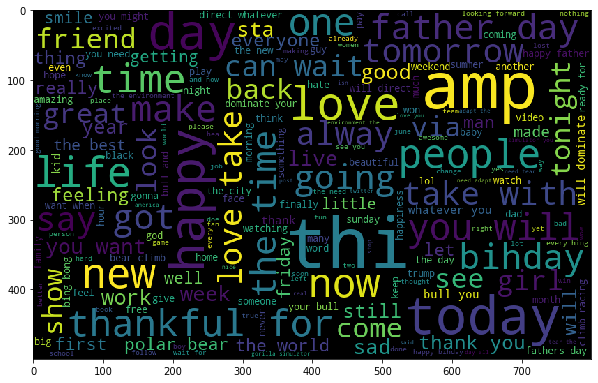

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height = 500, random_state=21, max_font_size=100).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.show()

# Combine all hate tweets 2

In [15]:
df2 = combDf['new_tweet'][combDf["label"]==1]
all_words = ' '.join([text for text in df2])

# Create word cloud for hate tweets

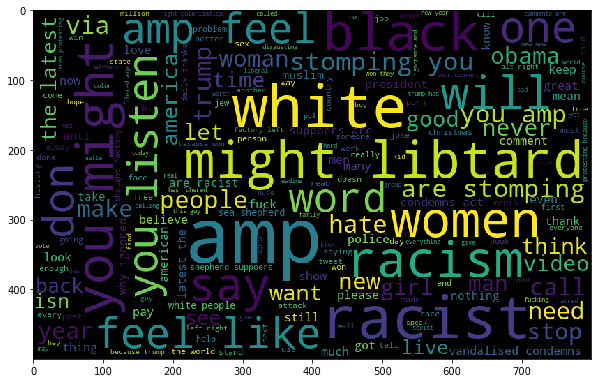

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.show()

# Combine all good tweets 2

In [17]:
import matplotlib.pyplot as plt
df2 = combDf['new_tweet'][combDf["label"]==0]
all_words= ' '.join([text for text in df2])

# Create wordcloud for good tweets 2

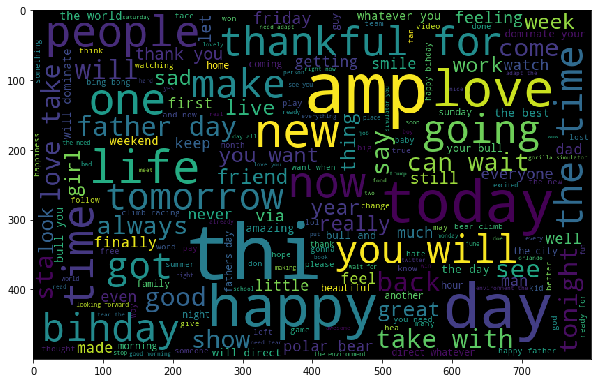

In [18]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height = 500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.show()

# Combine all hate tweets and hashes 3

In [19]:
import matplotlib.pyplot as plt
df2 = combDf['new_tweet'][combDf["label"]==1]
all_words = ' '.join([text for text in df2])
df2 = combDf['hash'][combDf["label"]==1]
all_hash = ' '.join([text for text in df2])
all_w = all_words + all_hash

# Create Wordcloud all words 3

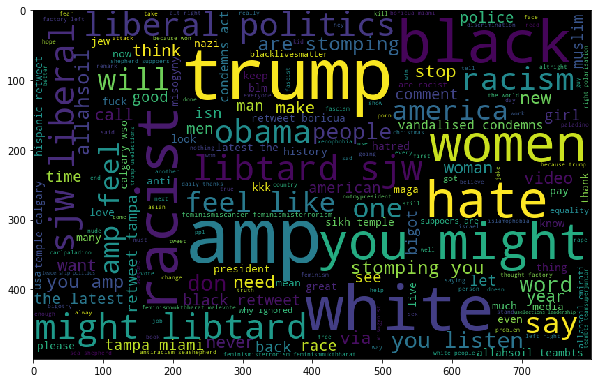

In [20]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height = 500, random_state=21, max_font_size=110).generate(all_w)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.show()

# Create wordcloud of all hashes

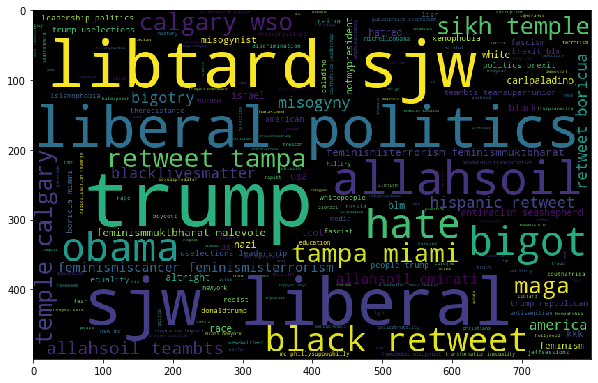

In [21]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height = 500, random_state=21, max_font_size=110).generate(all_hash)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.show()

# Create freqDist(word freq) and plot top 20 (1)

In [22]:
import nltk
import seaborn as sns
a= nltk.FreqDist(all_hash.split())
d= pd.DataFrame({'Hashtag': list(a.keys()),
                'Count': list(a.values())})
d.sample(10)


,Hashtag,Count
403,resistance,4
1683,flushed,1
780,rondarousey,3
852,dnc,1
1381,moronsmatter,1
376,profiling,2
129,ivankatrump,2
512,whitepower,2
290,terrorattack,1
800,kwanzaa,2


# Create Sparse Matrix

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
df = combDf[combDf["label"].isin([0,1])]
df["new_tweet"] += df["hash"]
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df = 2, max_features=3000, stop_words='english', ngram_range=(1,2))
bow= tfidf_vectorizer.fit_transform(df['new_tweet'])
bow.shape
                                    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(31962, 3000)

In [24]:
#print(bow)

# Create Baseline Model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
X = bow
y =df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

yp =  model.predict(X_test)
cm = confusion_matrix(yp, y_test)
print(np.shape(yp))
y_test[y_test==1].count()
cm

0.9649671567094151
(3197,)


array([[2954,   80],
       [  32,  131]], dtype=int64)

In [26]:
print(y_test[y_test==1].count())

211


In [27]:
yp2_prob = model.predict_proba(X_test)
yp2_prob

array([[0.97      , 0.03      ],
       [0.97116639, 0.02883361],
       [1.        , 0.        ],
       ...,
       [0.91967058, 0.08032942],
       [0.98911885, 0.01088115],
       [1.        , 0.        ]])

# Classification based on threshold

In [28]:
threshold = 0.19
yp2_prob = model.predict_proba(X_test)
yp2 = (yp2_prob [:,1] >= threshold).astype('int')
cm = confusion_matrix(yp2,y_test)
y_test[y_test==1].count()
cm

array([[2836,   52],
       [ 150,  159]], dtype=int64)

# Testing with sentence

In [29]:
s1= "white and black are not same"
s1New = tfidf_vectorizer.transform([s1])
p = model.predict(s1New)
print(p)
new_prob = model.predict_proba(s1New)
p2 = (new_prob [:,1] >= threshold).astype('int')
print (p2)

[0.]
[1]


# Naive bayes

In [30]:
df = pd.read_csv("train.csv")
df.groupby('label').label.count()

vectorizer = TfidfVectorizer(min_df=3, max_df=0.95, max_features=100000, ngram_range=(1,2))
sparsematrix = vectorizer.fit_transform(df.tweet)
sparsematrix.shape

(31962, 27196)

# Making a sparse matrix

In [31]:
X = sparsematrix
y = df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

# Fitting naive bayes algorithm

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, precision_score

model = MultinomialNB(alpha=0.03)
model.fit(X_train, y_train)
#precision_score(y_test,model.predict(X_test))
print(model.score(X_test, y_test))

0.9660566244329736


In [33]:
yp =  model.predict(X_test)
cm = confusion_matrix(yp, y_test)
print(np.shape(yp))
y_test[y_test==1].count()
cm

(6393,)


array([[5897,  184],
       [  33,  279]], dtype=int64)

In [34]:
def acc_vs_size(s):
    df = pd.read_csv("train.csv")
    df.groupby('label').label.count()
    
    vectorizer = TfidfVectorizer(min_df=2, max_df=0.95, max_features=s, ngram_range=(1,2))
    sparsematrix = vectorizer.fit_transform(df.tweet)
    sparsematrix.shape
    X = sparsematrix
    y = df.label
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model = MultinomialNB()
    model.fit(X_train, y_train)
#    return precision_score(y_test, model.predict(X_test))
    return model.score( X_test, y_test)
sizes = [x for x in range (1000, 100000, 5000)]
accuracy = [acc_vs_size(size) for size in sizes]

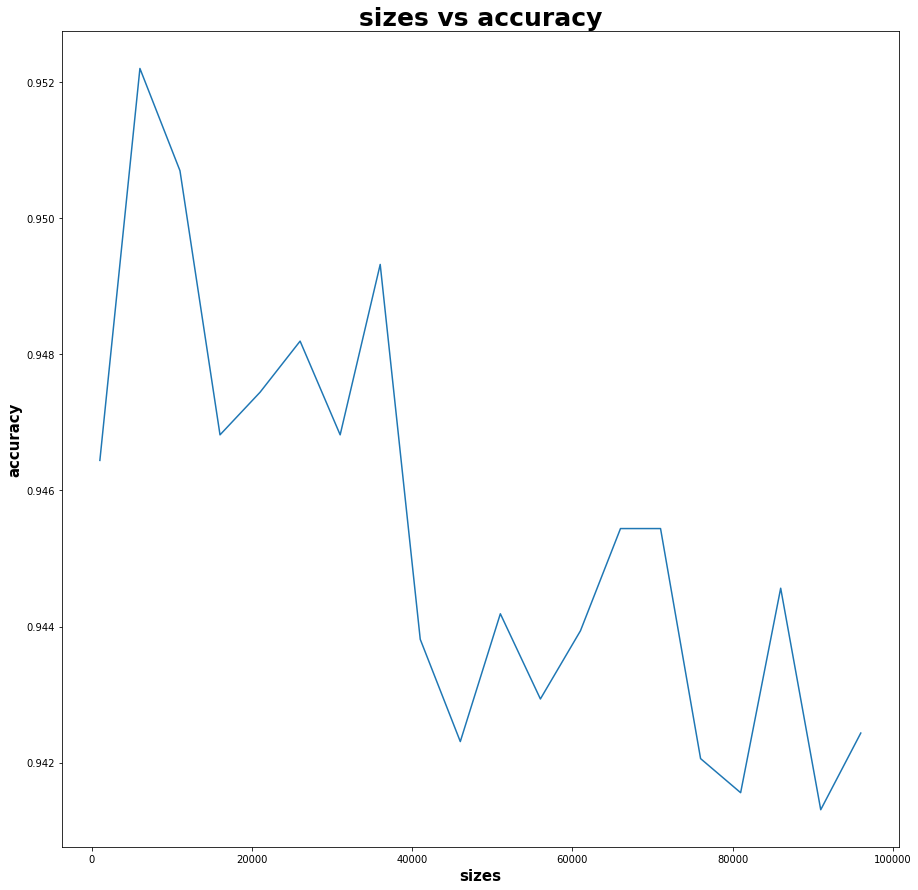

In [35]:
plt.figure(figsize=(15,15))
plt.xlabel("sizes",fontsize=15,fontweight='bold')
plt.ylabel("accuracy",fontsize=15,fontweight='bold')
plt.title("sizes vs accuracy",fontsize=25,fontweight='bold')

plt.plot(sizes, accuracy)

In [36]:
from tkinter import *
import tkinter as tk
from textblob import TextBlob
import nltk
from csv import *
from tkinter import messagebox
from textblob import Word
import cv2

#Setting Window
win = Tk()
win.title("Twitter Sentiment Analysis")
win.geometry("800x600+50+50")
win.config(bg='white')

#Window First Label
label1=Label(win, text="Welcome to Twitter Sentiment Analysis", font=("Calibri",18,"bold"), bg='white')
label1.pack(pady=15)

#Window 1 Text Analysis
def FirstWindow():
    win1 = Tk()
    win1.title("Twitter Text Analysis")
    win1.geometry("800x600+50+50")
    win1.focus_set()
    win1.config(bg='grey')

    #First Label
    label1=Label(win1, text="Tweet Analysis", font=("Calibri",18,"bold"), bg='white', fg="black")
    label1.pack(pady=15)

    #Second Label
    label2=Label(win1,text="Enter your tweet: ",font=("Calibri",16,"bold"), bg='white')
    label2.pack(pady=30)

    #Text Field
    entry1=Entry(win1,font=("Calibri",16))
    entry1.pack(pady=2)
    
    #Button Action
    def disp():
        global n
        n=entry1.get()
        #Sentiment Analysis
        sa=TextBlob(n)
        result=sa.sentiment.polarity
        if result > 0:
            result=result*100
            rs="Entered Tweet is "+str(result)+"% Positive."
            label3=Label(win1,text=rs,font=("Calibri",16), bg='white')
            label3.pack()
        elif result == 0:
            rs="Entered Tweet is Neutral."
            label3=Label(win1,text=rs,font=("Calibri",16), bg='white')
            label3.pack()
        else:
            result=result*(-1)
            result=result*100
            rs="Entered Tweet is "+str(result)+"% Negative."
            label3=Label(win1,text=rs,font=("Calibri",16), bg='white')
            label3.pack()

    #Button
    button1=Button(win1,text="Analyze",width=10,height=2, font=("Calibri",16,"bold"),bg="black",fg="white", command=disp)
    button1.pack(pady=5)
    
    win1.mainloop()
    
#Window Button1
button1=Button(win,text="Tweet Analysis",width=15,height=2, font=("Calibri",16,"bold"),bg="black",fg="white", command=FirstWindow)
button1.pack(pady=200)



win.mainloop()

# SENTIMENT ANALYSIS ON 2020 US ELECTIONS TWITTER DATA

According to popular tech website GeeksforGeeks, sentiment analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

Sentiment analysis is used by a number of data analytics companies on a variety of subjects. Some of the popular markets where it is used are:

Business: The marketing team of many companies use it to create business strategies, to understand how customers perceive their product and to understand customer behavior in order to improve sales.
Politics: In the political field, it is used to keep track of regions where the candidate is favourable and work towards regions where the candidate is not favourable in order to improve their chances in an election.


The US Presidential Elections was a good time to understand the public mood and opinion in different US states towards the candidates - Republican current president Donald Trump and Democratic challenger Joe Biden.

For this analysis, performed sentiment analysis of those tweets using VADER Sentiment Analysis.

In [37]:
tweet_df = pd.read_csv("tweets_election.csv")
tweet_df

,Unnamed: 0,geo,text,user,location,Subject,state
0,3,NaN,After the confrontation that cost Walter Wall...,wheresestela1,New Jersey,Donald Trump,New Jersey
1,6,NaN,"""COVID-19 is still raging. Trump is still lyi...",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas
2,11,NaN,"Donald Trump Jr.: ""Why aren't they talking ab...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts
3,15,NaN,Let’s not forget who created these problems. T...,ajserino,"New Jersey, USA",Donald Trump,New Jersey
4,16,NaN,There is no greater supporter of Donald Trump...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota
...,...,...,...,...,...,...,...
5548,1488,NaN,Donald Trump is just one big #COVID19 super s...,karen_brioso,"Salem, OR",Joe Biden,Oregon
5549,1490,NaN,Obama was a black voted by all! He reigned...,ArcYuyu,"Las Vegas, Nevada, USA",Joe Biden,Nevada
5550,1491,NaN,Tony Bobulinski Communicates A Message To Joe ...,USMCMIL03,"Texas, USA",Joe Biden,Texas
5551,1492,NaN,After campaigning in 2016 to lift up the ‘forg...,JoeBiden,"Wilmington, DE",Joe Biden,Delaware


In [38]:
tweet_df=tweet_df.drop(["Unnamed: 0"],axis=1)
tweet_df

,geo,text,user,location,Subject,state
0,NaN,After the confrontation that cost Walter Wall...,wheresestela1,New Jersey,Donald Trump,New Jersey
1,NaN,"""COVID-19 is still raging. Trump is still lyi...",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas
2,NaN,"Donald Trump Jr.: ""Why aren't they talking ab...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts
3,NaN,Let’s not forget who created these problems. T...,ajserino,"New Jersey, USA",Donald Trump,New Jersey
4,NaN,There is no greater supporter of Donald Trump...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota
...,...,...,...,...,...,...
5548,NaN,Donald Trump is just one big #COVID19 super s...,karen_brioso,"Salem, OR",Joe Biden,Oregon
5549,NaN,Obama was a black voted by all! He reigned...,ArcYuyu,"Las Vegas, Nevada, USA",Joe Biden,Nevada
5550,NaN,Tony Bobulinski Communicates A Message To Joe ...,USMCMIL03,"Texas, USA",Joe Biden,Texas
5551,NaN,After campaigning in 2016 to lift up the ‘forg...,JoeBiden,"Wilmington, DE",Joe Biden,Delaware


In [39]:
# import re
# def clean_tweets(text):
#   text = re.sub("RT @[\w]*:","",text)
#   text = re.sub("@[\w]*","",text)
#   text = re.sub("https?://[A-Za-z0-9./]*","",text)
#   text = re.sub("\n","",text)
#   return text

In [40]:
search_words = "Joe Biden"
date_since = "2020-10-27"

In [41]:
# tweet_df['text'] = tweet_df['text'].apply(lambda x: clean_tweets(x))
tweet_df['Subject'] = search_words
tweet_df.head(20)

,geo,text,user,location,Subject,state
0,NaN,After the confrontation that cost Walter Wall...,wheresestela1,New Jersey,Joe Biden,New Jersey
1,NaN,"""COVID-19 is still raging. Trump is still lyi...",TheFemaleYungin,"The Wrong Address, Texas",Joe Biden,Texas
2,NaN,"Donald Trump Jr.: ""Why aren't they talking ab...",KathrynTomashu1,"Northborough, MA",Joe Biden,Massachusetts
3,NaN,Let’s not forget who created these problems. T...,ajserino,"New Jersey, USA",Joe Biden,New Jersey
4,NaN,There is no greater supporter of Donald Trump...,SpeakBravely,"Twin Cities, Minnesota",Joe Biden,Minnesota
5,NaN,'A vote for Donald Trump is a vote against the...,TMScarletFire,"Salem, MA",Joe Biden,Massachusetts
6,NaN,There is no greater supporter of Donald Trump...,mwamsley5,Ohio,Joe Biden,Ohio
7,NaN,The same people who are outraged at AOC for s...,SpeakBravely,"Twin Cities, Minnesota",Joe Biden,Minnesota
8,NaN,Donald Trump is on track to become the worst ...,XchargerFan619,"San Diego, CA",Joe Biden,California
9,NaN,"It is Friday, October 30, 2020. One citizen, I...",eachlifeinplace,Iowa,Joe Biden,Iowa


In this analysis, we are mostly concerned with finding the political mood of each and every US state currently from the twitter data. This location data is mostly blank. For others, it may consist of the country name only, city name only or the city and state separated by a comma and so on.

In the next part, we form a list of US states and another list of US state codes in order to extract tweets which contain these in the location record. 

In [42]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii',
          'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
          'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New York', 'New Mexico', 'North Carolina',
          'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
          'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
stateCodes = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
              'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA',
              'WA', 'WV', 'WI', 'WY']
stateMapping = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 
                  'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 
                  'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 
                  'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 
                  'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 
                  'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NY': 'New York', 
                  'NM': 'New Mexico', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 
                  'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 
                  'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT':  'Utah', 'VT': 'Vermont', 
                  'VA': 'Virginia', 'WA': 'Washington', 'WV':  'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}
tweet_copied_df = tweet_df
for index, row in tweet_df.iterrows():
  flag = 0
  if row.location:
    locationSplit = row.location.split(',')
    for word in locationSplit:
      word_stripped = word.strip()
      if word_stripped in states:
        flag = 1
        row['state'] = word_stripped
      elif word_stripped in stateCodes:
        flag = 1
        row['state'] = stateMapping[word_stripped]
  if flag == 0:
    tweet_copied_df = tweet_copied_df.drop(index=index)
  else:
    tweet_copied_df.loc[index, 'state'] = row['state']

At the end, we append the cleaned data to an existing csv file to create a corpus of twitter data on which we will use our sentiment analyser. For the purposes of this project, I ran the above lines of code in a loop with an interval of 15 minutes in between every iteration.

# Sentiment Analysis

We use the VADER Sentiment Analyzer in order to perform the sentiment analysis. According to GeeksforGeeks, VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. A sentiment lexicon is a list of lexical features, in simpler terms words which are generally labeled according to their semantic orientation as either positive or negative. VADER not only categorizes a sentiment as positive or negative but also tells us how positive or negative a sentiment is.

In [43]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\CH
[nltk_data]     Rani\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [44]:
sid = SentimentIntensityAnalyzer()

Next up, we separate out the tweets of the two candidates into separate dataframes.

In [45]:
tweets_election_df = pd.read_csv('tweets_election.csv')
tweets_trump = tweets_election_df[tweets_election_df.Subject == 'Donald Trump']
tweets_trump.drop(tweets_trump.columns[0], axis=1, inplace = True)
tweets_trump.head()

C:\Users\CH Rani\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,geo,text,user,location,Subject,state
0,NaN,After the confrontation that cost Walter Wall...,wheresestela1,New Jersey,Donald Trump,New Jersey
1,NaN,"""COVID-19 is still raging. Trump is still lyi...",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas
2,NaN,"Donald Trump Jr.: ""Why aren't they talking ab...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts
3,NaN,Let’s not forget who created these problems. T...,ajserino,"New Jersey, USA",Donald Trump,New Jersey
4,NaN,There is no greater supporter of Donald Trump...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota


In [46]:
tweets_biden = tweets_election_df[tweets_election_df.Subject == 'Joe Biden']
tweets_biden.drop(tweets_biden.columns[0], axis=1, inplace = True)
tweets_biden.head()

C:\Users\CH Rani\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,geo,text,user,location,Subject,state
2928,NaN,Unfortunately she along with other politicia...,gmollo1115,"Georgia, USA",Joe Biden,Georgia
2929,NaN,Let’s talk about the Hunter laptop and such. ...,mcritter61,"Houston, TX",Joe Biden,Texas
2930,NaN,Fun to think about how we learned today that ...,1kingsbay,"on the river, FL",Joe Biden,Florida
2931,NaN,Larry Kudlow: Joe Biden's economic plan would...,JanedgeJanis,"Texas, USA",Joe Biden,Texas
2932,NaN,A 64-page document asserting an elaborate con...,denopotter,"Dallas, TX",Joe Biden,Texas


Text(0.5, 1.0, 'Comparison of Twitter mentions of both candidates in all US states as per data collected')

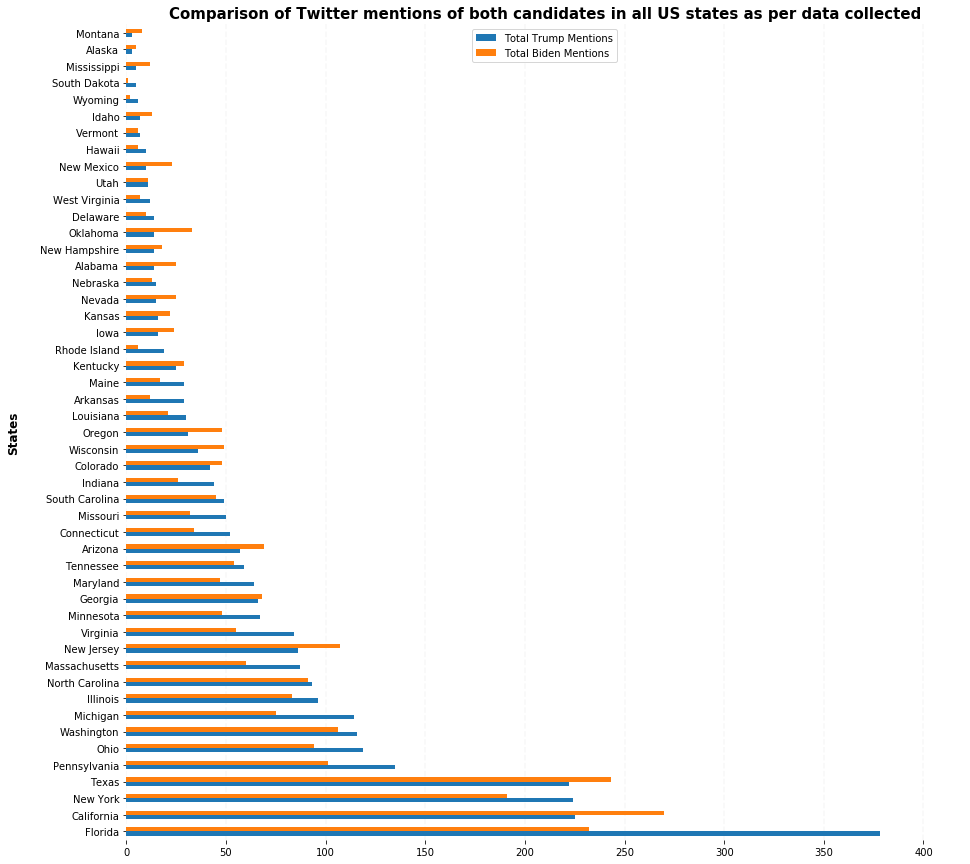

In [47]:
df = pd.merge(tweets_trump['state'].value_counts(), tweets_biden['state'].value_counts(), right_index = True, 
               left_index = True)
df = df.rename(columns = {"state_x": "Total Trump Mentions", "state_y": "Total Biden Mentions"})
ax = df.plot(kind='barh', figsize=(15, 15), zorder=2)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Replacing ticks with horizontal lines
#ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set y-axis label
ax.set_ylabel("States", labelpad=20, weight='bold', size=12)
ax.set_title('Comparison of Twitter mentions of both candidates in all US states as per data collected',fontweight="bold", size=15)

The above graphic shows a huge shortcoming of our analysis. Our dataset, like many other datasets is not a well distributed dataset. This means we have some states like Florida, California, Texas which have more data than others. Also, it seems that the amount of data related to Trump exceeds Biden's data by a small margin.

We proceed with our sentiment analysis now. To start off, we apply the polarity_scores() method to every tweet text in order to understand the sentiment of the tweet. The result of this method call is a dictionary showing the intensity of negative, neutral and positive sentiment in the tweet. All these three values are used to create the fourth figure which is the overall compound sentiment of the tweet. We will use this figure to judge whether the sentiment of a tweet is positive, negative or neutral.

In [48]:
tweets_trump['sentiment'] = tweets_trump['text'].apply(lambda x: sid.polarity_scores(x))
tweets_biden['sentiment'] = tweets_biden['text'].apply(lambda x: sid.polarity_scores(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
def sentimentVerdict(sentiment):
  if sentiment['compound'] >= 0.05:
    return "Positive"
  elif sentiment['compound'] <= -0.05:
    return "Negative"
  else:
    return "Neutral"

In [50]:
tweets_trump['sentiment_overall'] = tweets_trump['sentiment'].apply(lambda x: sentimentVerdict(x))
tweets_trump.head(20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,geo,text,user,location,Subject,state,sentiment,sentiment_overall
0,NaN,After the confrontation that cost Walter Wall...,wheresestela1,New Jersey,Donald Trump,New Jersey,"{'neg': 0.181, 'neu': 0.819, 'pos': 0.0, 'comp...",Negative
1,NaN,"""COVID-19 is still raging. Trump is still lyi...",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas,"{'neg': 0.327, 'neu': 0.673, 'pos': 0.0, 'comp...",Negative
2,NaN,"Donald Trump Jr.: ""Why aren't they talking ab...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts,"{'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'comp...",Positive
3,NaN,Let’s not forget who created these problems. T...,ajserino,"New Jersey, USA",Donald Trump,New Jersey,"{'neg': 0.251, 'neu': 0.566, 'pos': 0.184, 'co...",Negative
4,NaN,There is no greater supporter of Donald Trump...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota,"{'neg': 0.169, 'neu': 0.654, 'pos': 0.177, 'co...",Positive
5,NaN,'A vote for Donald Trump is a vote against the...,TMScarletFire,"Salem, MA",Donald Trump,Massachusetts,"{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'comp...",Positive
6,NaN,There is no greater supporter of Donald Trump...,mwamsley5,Ohio,Donald Trump,Ohio,"{'neg': 0.169, 'neu': 0.654, 'pos': 0.177, 'co...",Positive
7,NaN,The same people who are outraged at AOC for s...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota,"{'neg': 0.299, 'neu': 0.613, 'pos': 0.088, 'co...",Negative
8,NaN,Donald Trump is on track to become the worst ...,XchargerFan619,"San Diego, CA",Donald Trump,California,"{'neg': 0.227, 'neu': 0.773, 'pos': 0.0, 'comp...",Negative
9,NaN,"It is Friday, October 30, 2020. One citizen, I...",eachlifeinplace,Iowa,Donald Trump,Iowa,"{'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compou...",Positive


In [51]:
tweets_biden['sentiment_overall'] = tweets_biden['sentiment'].apply(lambda x: sentimentVerdict(x))
tweets_biden.head(20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,geo,text,user,location,Subject,state,sentiment,sentiment_overall
2928,NaN,Unfortunately she along with other politicia...,gmollo1115,"Georgia, USA",Joe Biden,Georgia,"{'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'comp...",Negative
2929,NaN,Let’s talk about the Hunter laptop and such. ...,mcritter61,"Houston, TX",Joe Biden,Texas,"{'neg': 0.146, 'neu': 0.758, 'pos': 0.096, 'co...",Negative
2930,NaN,Fun to think about how we learned today that ...,1kingsbay,"on the river, FL",Joe Biden,Florida,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...",Positive
2931,NaN,Larry Kudlow: Joe Biden's economic plan would...,JanedgeJanis,"Texas, USA",Joe Biden,Texas,"{'neg': 0.127, 'neu': 0.873, 'pos': 0.0, 'comp...",Negative
2932,NaN,A 64-page document asserting an elaborate con...,denopotter,"Dallas, TX",Joe Biden,Texas,"{'neg': 0.159, 'neu': 0.841, 'pos': 0.0, 'comp...",Negative
2933,NaN,He is a profoundly decent man: a man of faith...,afquillen,"Crossville, Tennessee",Joe Biden,Tennessee,"{'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'comp...",Positive
2934,NaN,"Every CNN show should end with ""I'm Joe Biden...",sistertoldjah,"Charlotte, North Carolina",Joe Biden,North Carolina,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...",Positive
2935,NaN,"Rest assured, that’s my best friend who wrot...",JFJMayer8,"Oregon, USA",Joe Biden,Oregon,"{'neg': 0.0, 'neu': 0.586, 'pos': 0.414, 'comp...",Positive
2936,NaN,"Winston Churchill’s granddaughter, Edwina San...",jerryChromeX,"Texas, USA",Joe Biden,Texas,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
2937,NaN,If Sleepy Joe Biden is actually elected Presi...,weisarts,"San Francisco, CA",Joe Biden,California,"{'neg': 0.112, 'neu': 0.717, 'pos': 0.17, 'com...",Positive


Now that we have classified every tweet data as either positive, negative or neutral, we can group by state and understand the general opinion of the public of that state regarding a particular candidate. This is our next course of action.

In [52]:
tweets_trump_location = tweets_trump.groupby(['state', 'sentiment_overall']).count()
tweets_trump_location = tweets_trump_location['user']
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(tweets_trump_location)

state           sentiment_overall
Alabama         Negative               4
                Neutral                3
                Positive               7
Alaska          Neutral                1
                Positive               2
Arizona         Negative              17
                Neutral               20
                Positive              20
Arkansas        Negative               6
                Neutral               12
                Positive              11
California      Negative              87
                Neutral               51
                Positive              87
Colorado        Negative              14
                Neutral                9
                Positive              19
Connecticut     Negative              19
                Neutral               17
                Positive              16
Delaware        Negative               4
                Neutral                6
                Positive               4
Florida         Negativ

In [53]:
tweets_biden_location = tweets_biden.groupby(['state', 'sentiment_overall']).count()
tweets_biden_location = tweets_biden_location['user']
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(tweets_biden_location)

state           sentiment_overall
Alabama         Negative              10
                Neutral                9
                Positive               6
Alaska          Negative               2
                Neutral                1
                Positive               2
Arizona         Negative              24
                Neutral               18
                Positive              27
Arkansas        Negative               3
                Neutral                4
                Positive               5
California      Negative             115
                Neutral               68
                Positive              87
Colorado        Negative              17
                Neutral               13
                Positive              18
Connecticut     Negative              13
                Neutral               11
                Positive              10
Delaware        Negative               4
                Neutral                3
                Positiv

In [54]:
tweets_location_df = pd.DataFrame({'State': [state for state in states],
                                         'Trump Positive': [0 for state in states],
                                         'Trump Negative': [0 for state in states],
                                         'Trump Neutral': [0 for state in states],
                                         'Trump Total': [0 for state in states],
                                         'Biden Positive': [0 for state in states],
                                         'Biden Negative': [0 for state in states],
                                         'Biden Neutral': [0 for state in states],
                                         'Biden Total': [0 for state in states]})
tweets_location_df.set_index('State', inplace = True)
for state in states:
  positiveTrump, negativeTrump, neutralTrump, positiveBiden, negativeBiden, neutralBiden = 0, 0, 0, 0, 0, 0
  try:
    positiveTrump = tweets_trump_location[state]['Positive']
  except:
    positiveTrump = 0
  
  try:
    negativeTrump = tweets_trump_location[state]['Negative']
  except:
    negativeTrump = 0
  
  try:
    neutralTrump = tweets_trump_location[state]['Neutral']
  except:
    neutralTrump = 0
  
  try:
    positiveBiden = tweets_biden_location[state]['Positive']
  except:
    positiveBiden = 0
  
  try:
    negativeBiden = tweets_biden_location[state]['Negative']
  except:
    negativeBiden = 0
  
  try:
    neutralBiden = tweets_biden_location[state]['Neutral']
  except:
    neutralBiden = 0

  totalTrump = positiveTrump + negativeTrump + neutralTrump
  totalBiden = positiveBiden + negativeBiden + neutralBiden

  if totalTrump == 0:
    tweets_location_df.at[state, 'Trump Positive'], tweets_location_df.at[state, 'Trump Negative'], tweets_location_df.at[state, 'Trump Neutral'] = 0,0,0
  else:
    tweets_location_df.at[state, 'Trump Positive'] = round((positiveTrump/totalTrump)*100.0)
    tweets_location_df.at[state, 'Trump Negative'] = round((negativeTrump/totalTrump)*100.0)
    tweets_location_df.at[state, 'Trump Neutral'] = round((neutralTrump/totalTrump)*100.0)
  tweets_location_df.at[state, 'Trump Total'] = totalTrump
  
  if totalBiden == 0:
    tweets_location_df.at[state, 'Biden Positive'], tweets_location_df.at[state, 'Biden Negative'], tweets_location_df.at[state, 'Biden Neutral'] = 0,0,0
  else:
    tweets_location_df.at[state, 'Biden Positive'] = round((positiveBiden/totalBiden)*100.0)
    tweets_location_df.at[state, 'Biden Negative'] = round((negativeBiden/totalBiden)*100.0)
    tweets_location_df.at[state, 'Biden Neutral'] = round((neutralBiden/totalBiden)*100.0)
  tweets_location_df.at[state, 'Biden Total'] = totalBiden
tweets_location_df

,Trump Positive,Trump Negative,Trump Neutral,Trump Total,Biden Positive,Biden Negative,Biden Neutral,Biden Total
State,,,,,,,,
Alabama,50,29,21,14,24,40,36,25
Alaska,67,0,33,3,40,40,20,5
Arizona,35,30,35,57,39,35,26,69
Arkansas,38,21,41,29,42,25,33,12
California,39,39,23,225,32,43,25,270
Colorado,45,33,21,42,38,35,27,48
Connecticut,31,37,33,52,29,38,32,34
Delaware,29,29,43,14,30,40,30,10
Florida,37,34,29,378,31,31,37,232


To wrap up our analysis, we use the above analysis to classify whether a state is one of hthe following:

1.Strongly Republican: The number of positive tweets on Trump exceeds the same for Biden and the number of negative tweets on Trump is less than that of Biden or the number of tweets where the sentiment is neutral to Trump is more than that of Biden.


2.Strongly Democratic: The number of positive tweets on Biden exceeds the same for Trump and the number of negative tweets on Biden is less than that of Trump or the number of tweets where the sentiment is neutral to Biden is more than that of Trump.


3.Somewhat Republican: The margin between positive Trump tweets and positive Biden tweets is more than the margin for negative tweets.


4.Somewhat Democratic: The margin between positive Trump tweets and positive Biden tweets is less than the margin for negative tweets.


5.Insufficient Data: States in which the number of tweets made on either contestant is less than 15.


In [55]:
tweets_location_df['Predicted Judgement'] = 'Neutral'
for index, row in tweets_location_df.iterrows():
  if row['Trump Total'] <= 15 and row['Biden Total'] <= 15:
    tweets_location_df.loc[index, 'Predicted Judgement'] = 'Insufficient Data'
  else:
    if row['Trump Positive'] > row['Biden Positive'] and (row['Trump Negative'] < row['Biden Negative'] or row['Trump Neutral'] > row['Biden Neutral']):
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Strongly Republican'
    elif row['Biden Positive'] > row['Trump Positive'] and (row['Biden Negative'] < row['Trump Negative'] or row['Biden Neutral'] > row['Trump Neutral']):
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Strongly Democratic'
    elif row['Trump Positive'] - row['Biden Positive'] > row['Biden Negative'] - row['Trump Negative']:
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Somewhat Republican'
    elif row['Biden Positive'] - row['Trump Positive'] > row['Trump Negative'] - row['Biden Negative']:
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Somewhat Democratic'
tweets_location_df = tweets_location_df.rename(columns={'Trump Positive': 'Trump Positive (in %)', 
                                                        'Trump Negative': 'Trump Negative (in %)',
                                                        'Trump Neutral': 'Trump Neutral (in %)',
                                                        'Trump Total': 'Trump Total Mentions',
                                                        'Biden Positive': 'Biden Positive (in %)',
                                                        'Biden Negative': 'Biden Negative (in %)',
                                                        'Biden Neutral': 'Biden Neutral (in %)',
                                                        'Biden Total': 'Biden Total Mentions'})
tweets_location_df

,Trump Positive (in %),Trump Negative (in %),Trump Neutral (in %),Trump Total Mentions,Biden Positive (in %),Biden Negative (in %),Biden Neutral (in %),Biden Total Mentions,Predicted Judgement
State,,,,,,,,,
Alabama,50,29,21,14,24,40,36,25,Strongly Republican
Alaska,67,0,33,3,40,40,20,5,Insufficient Data
Arizona,35,30,35,57,39,35,26,69,Somewhat Democratic
Arkansas,38,21,41,29,42,25,33,12,Somewhat Democratic
California,39,39,23,225,32,43,25,270,Strongly Republican
Colorado,45,33,21,42,38,35,27,48,Strongly Republican
Connecticut,31,37,33,52,29,38,32,34,Strongly Republican
Delaware,29,29,43,14,30,40,30,10,Insufficient Data
Florida,37,34,29,378,31,31,37,232,Somewhat Republican


In [56]:
tweets_location_df.groupby('Predicted Judgement').size()

Predicted Judgement
Insufficient Data      13
Somewhat Democratic    10
Somewhat Republican     7
Strongly Democratic     6
Strongly Republican    14
dtype: int64